In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import numpy as np

In [2]:
df = pd.read_csv('./assignments_from_pool_Quality_5.tsv', sep="\t")

In [3]:
df = df.drop(columns=['GOLDEN:ad', 'GOLDEN:not_ad', 'GOLDEN:ban_insult_hard', 'GOLDEN:ban_shock_content', 'GOLDEN:ban_shock_content',
'HINT:text', 'HINT:default_language'])


In [4]:
df = df.fillna(0)
def f(row):
    if row['OUTPUT:ad'] == 'yes':
        val = 'ad'
    elif row['OUTPUT:not_ad'] != 0:
        val = 'not_ad'
    elif row['OUTPUT:ban_insult_hard'] != 0:
        val = 'ban_insult_hard'
    elif row['OUTPUT:ban_shock_content'] != 0:
        val = 'ban_shock_content'    
    else:
        val = ' '
    return val

df['OUTPUT:label'] = df.apply(f, axis=1)



In [5]:
df.head()

,INPUT:label,INPUT:comment,INPUT:task-id,OUTPUT:ad,OUTPUT:not_ad,OUTPUT:ban_insult_hard,OUTPUT:ban_shock_content,ASSIGNMENT:worker_id,OUTPUT:label
0,ban_shock_content,Самоубийца на стройке. Парень-гастрабайтер пры...,328,no,0,0,True,0186400b77dcfad3fd78b2c08981ebd8,ban_shock_content
1,ad,Москва с 89 этажа прекрасна!!!. Друзья! Посети...,190,yes,0,0,0,0186400b77dcfad3fd78b2c08981ebd8,ad
2,ban_shock_content,"Оглашен приговор сочинскому педофилу, от котор...",398,no,0,0,True,0186400b77dcfad3fd78b2c08981ebd8,ban_shock_content
3,ad,Наращивание ресниц. Наращивание ресниц Класси...,50,yes,0,0,0,0186400b77dcfad3fd78b2c08981ebd8,ad
4,ban_insult_hard,"Транспорт, что происходит?. Товарищи, это како...",228,no,True,0,0,0186400b77dcfad3fd78b2c08981ebd8,not_ad


In [6]:
df = df.drop(columns=['OUTPUT:ad', 'OUTPUT:not_ad', 'OUTPUT:ban_insult_hard', 'OUTPUT:ban_shock_content'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   INPUT:label           1796 non-null   object
 1   INPUT:comment         1796 non-null   object
 2   INPUT:task-id         1796 non-null   int64 
 3   ASSIGNMENT:worker_id  1796 non-null   object
 4   OUTPUT:label          1796 non-null   object
dtypes: int64(1), object(4)
memory usage: 70.3+ KB


In [8]:
#сохранения в tsv
df.to_csv('Quality_5.tsv', sep="\t", index=False)

In [9]:
df[df['INPUT:label'] == df['OUTPUT:label']].count()[0]

1599

In [10]:
df[df['INPUT:label'] != df['OUTPUT:label']].count()[0]

197

In [11]:
# 10% неправильных ответов
df[df['INPUT:label'] == df['OUTPUT:label']].count()[0]/df.count()[0]

0.8903118040089086

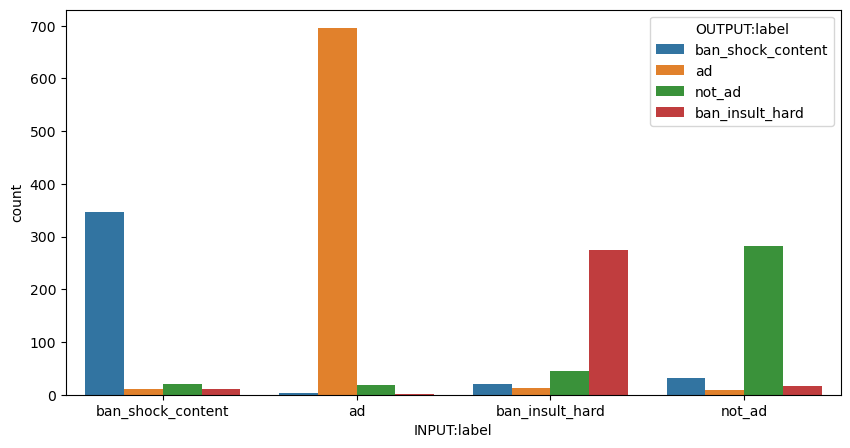

In [12]:
# 
_, axes = plt.subplots(1, sharey=True, figsize=(10,5))


sns.countplot(x='INPUT:label', hue='OUTPUT:label', data=df);

In [13]:
df[(df['INPUT:label'] != df['OUTPUT:label']) & (df['INPUT:label'] == 'ad')]

,INPUT:label,INPUT:comment,INPUT:task-id,ASSIGNMENT:worker_id,OUTPUT:label
23,ad,Продам помещение под любую коммерческую деятел...,108,0186400b77dcfad3fd78b2c08981ebd8,not_ad
62,ad,Выберете ли Вы в качестве подарка - Фотомозаик...,188,0186400b77dcfad3fd78b2c08981ebd8,not_ad
290,ad,Удалённая работа . Без опыта. Без вложений.. *...,199,44633628dd3a0aab288841e755096ec3,not_ad
548,ad,Москва с 89 этажа прекрасна!!!. Друзья! Посети...,190,8053a75fc8cff449cc4d72d30f6149e7,not_ad
560,ad,"Где заказываете крауд-ссылки?. Поделитесь, кто...",84,a90953f93f3f8a773f97cbaef9c71128,not_ad
574,ad,Счастливая гусиная жизнь. Гостиница Великого У...,79,a90953f93f3f8a773f97cbaef9c71128,not_ad
674,ad,"Где заказываете крауд-ссылки?. Поделитесь, кто...",84,92a2f25c0d46d8795c3d839f8bc6a1a9,not_ad
796,ad,Москва с 89 этажа прекрасна!!!. Друзья! Посети...,190,71e6a682634665e2b3c3a962072be48c,not_ad
1098,ad,Законное списание кредитов!. Спишите с себя вс...,121,bca46e60ea39762ce17cf9e0f93f47ae,ban_insult_hard
1168,ad,"Нужны отзывы!!. Кто заказываю тут окна, подели...",17,85c3e25eb1f16e764999737d96c96f4d,not_ad


In [14]:
df = df.fillna(0)
def f(row):
    if row['INPUT:label'] == row['OUTPUT:label']:
        val = 0
    else:
        val = 1
    return val

df['result'] = df.apply(f, axis=1)

In [15]:
df.head()

,INPUT:label,INPUT:comment,INPUT:task-id,ASSIGNMENT:worker_id,OUTPUT:label,result
0,ban_shock_content,Самоубийца на стройке. Парень-гастрабайтер пры...,328,0186400b77dcfad3fd78b2c08981ebd8,ban_shock_content,0
1,ad,Москва с 89 этажа прекрасна!!!. Друзья! Посети...,190,0186400b77dcfad3fd78b2c08981ebd8,ad,0
2,ban_shock_content,"Оглашен приговор сочинскому педофилу, от котор...",398,0186400b77dcfad3fd78b2c08981ebd8,ban_shock_content,0
3,ad,Наращивание ресниц. Наращивание ресниц Класси...,50,0186400b77dcfad3fd78b2c08981ebd8,ad,0
4,ban_insult_hard,"Транспорт, что происходит?. Товарищи, это како...",228,0186400b77dcfad3fd78b2c08981ebd8,not_ad,1


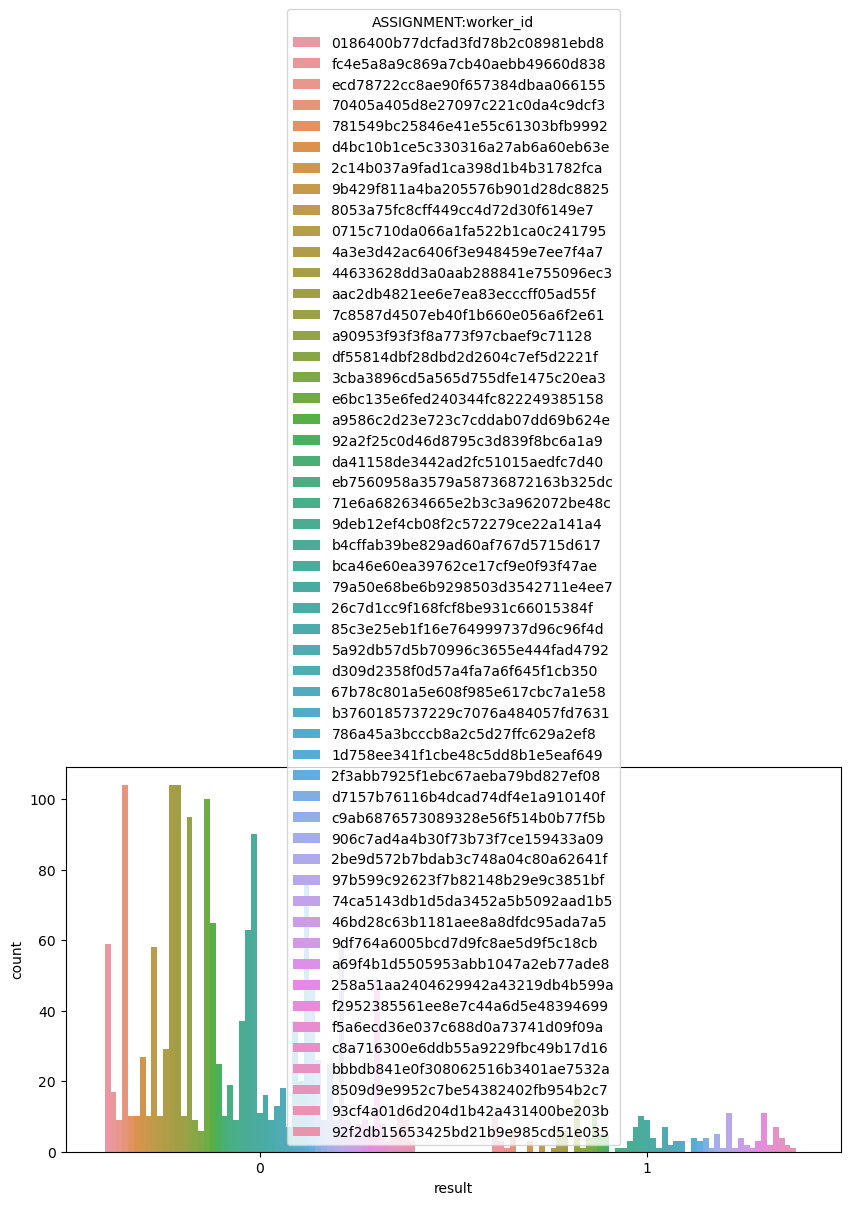

In [16]:
# 
_, axes = plt.subplots(1, sharey=True, figsize=(10,5))


sns.countplot(x='result', hue='ASSIGNMENT:worker_id', data=df);

In [17]:
pd.crosstab(df['INPUT:task-id'], df['result'], margins=True)

result,0,1,All
INPUT:task-id,,,
0,3,0,3
1,3,0,3
2,3,0,3
3,3,0,3
4,3,0,3
...,...,...,...
496,3,0,3
497,2,1,3
498,1,2,3


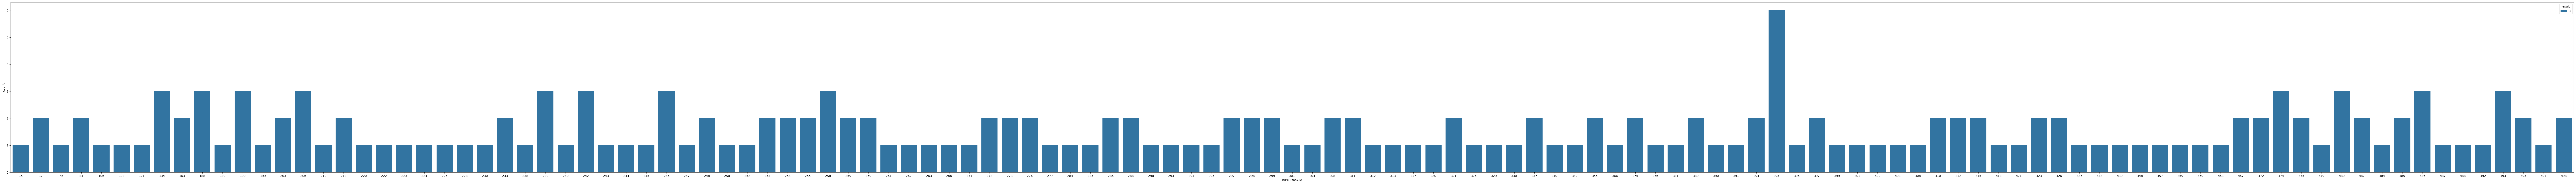

In [30]:
y = df[(df['result']==1)]
_, axes = plt.subplots(1, sharey=True, figsize=(150,10))
sns.countplot(x='INPUT:task-id', hue='result', data=y);

In [ ]:
df.groupby(['INPUT:task-id'])[['result']].agg([np.mean])